In [2]:
import openpyxl
2+3

5

In [12]:
import matplotlib as plt
import pandas as pd

In [13]:
df=pd.read_csv("age_buynotbuy.csv")
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


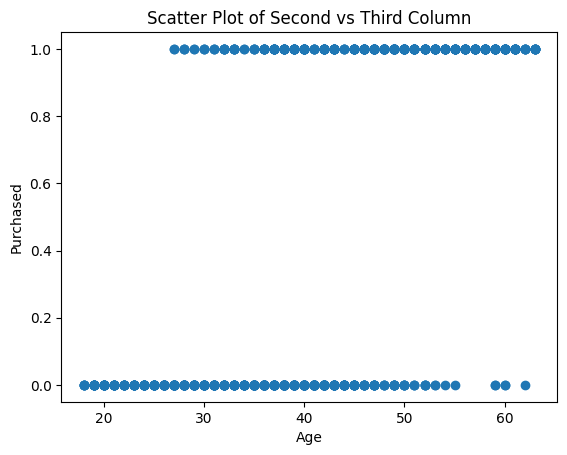

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame
plt.scatter(df.iloc[:, 2], df.iloc[:, 4])  # Second and third columns (0-based index)
plt.xlabel(df.columns[2])  # Label for X-axis (name of the second column)
plt.ylabel(df.columns[4])  # Label for Y-axis (name of the third column)
plt.title("Scatter Plot of Second vs Third Column")
plt.show()

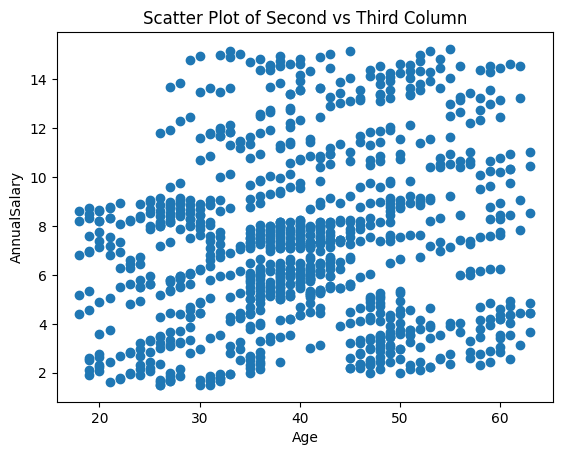

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame
plt.scatter(df.iloc[:, 2], df.iloc[:, 3]/10000)  # Second and third columns (0-based index)
plt.xlabel(df.columns[2])  # Label for X-axis (name of the second column)
plt.ylabel(df.columns[3])  # Label for Y-axis (name of the third column)
plt.title("Scatter Plot of Second vs Third Column")
plt.show()

Original Data:
   User ID Gender  Age  AnnualSalary  Purchased
0      385   Male   35         20000          0
1      681   Male   40         43500          0
2      353   Male   49         74000          0
3      895   Male   40        107500          1
4      661   Male   25         79000          0

Data Types:
User ID          int64
Gender          object
Age              int64
AnnualSalary     int64
Purchased        int64
dtype: object

Encoded Data:
   User ID  Gender  Age  AnnualSalary  Purchased
0      385       1   35         20000          0
1      681       1   40         43500          0
2      353       1   49         74000          0
3      895       1   40        107500          1
4      661       1   25         79000          0

Explained Variance Ratio:
[0.36246547 0.20579011 0.19153806 0.17109299 0.06911336]


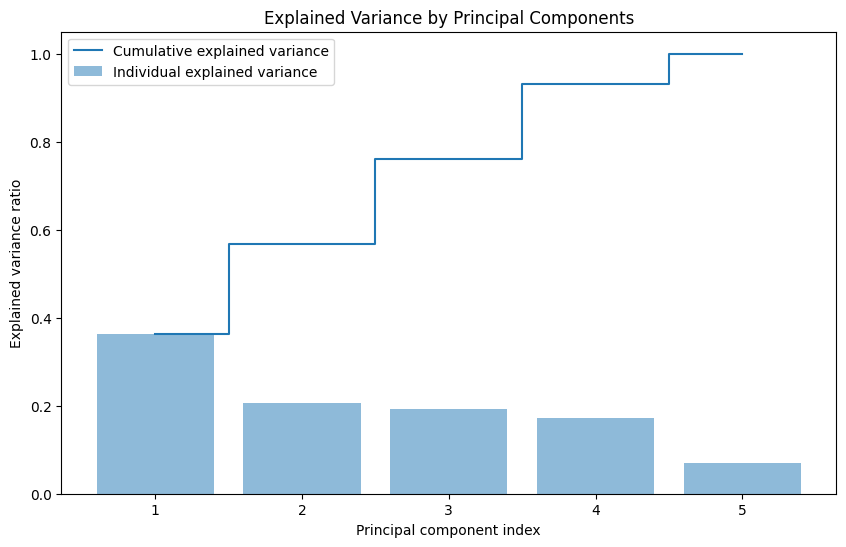

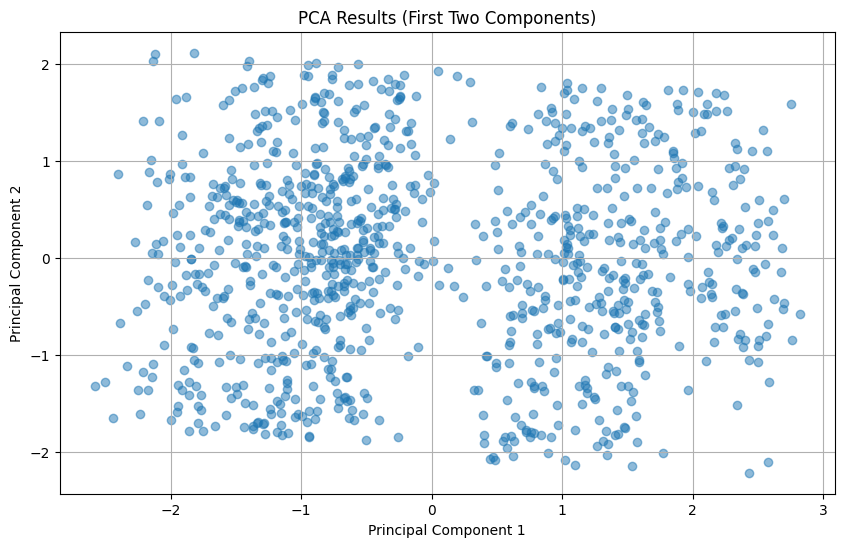


PCA Loadings:
                   PC1       PC2       PC3       PC4       PC5
User ID       0.035998  0.762944  0.643366  0.051955 -0.001437
Gender       -0.136277 -0.635169  0.754767  0.073831 -0.053532
Age           0.601951 -0.052892  0.066535 -0.481750 -0.631148
AnnualSalary  0.429660 -0.034278 -0.053771  0.864509 -0.252885
Purchased     0.658164 -0.102494  0.095341 -0.111315  0.731323


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('age_buynotbuy.csv')

# Display original data
print("Original Data:")
print(df.head())
print("\nData Types:")
print(df.dtypes)

# Convert categorical columns to numerical values
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Display encoded data
print("\nEncoded Data:")
print(df.head())

# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, 
                     columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

# Explained variance ratio
print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_),
         where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()

# Plot first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results (First Two Components)')
plt.grid()
plt.show()

# Display PCA loadings (how original features contribute to PCs)
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(pca_result.shape[1])],
                        index=df.columns)
print("\nPCA Loadings:")
print(loadings)

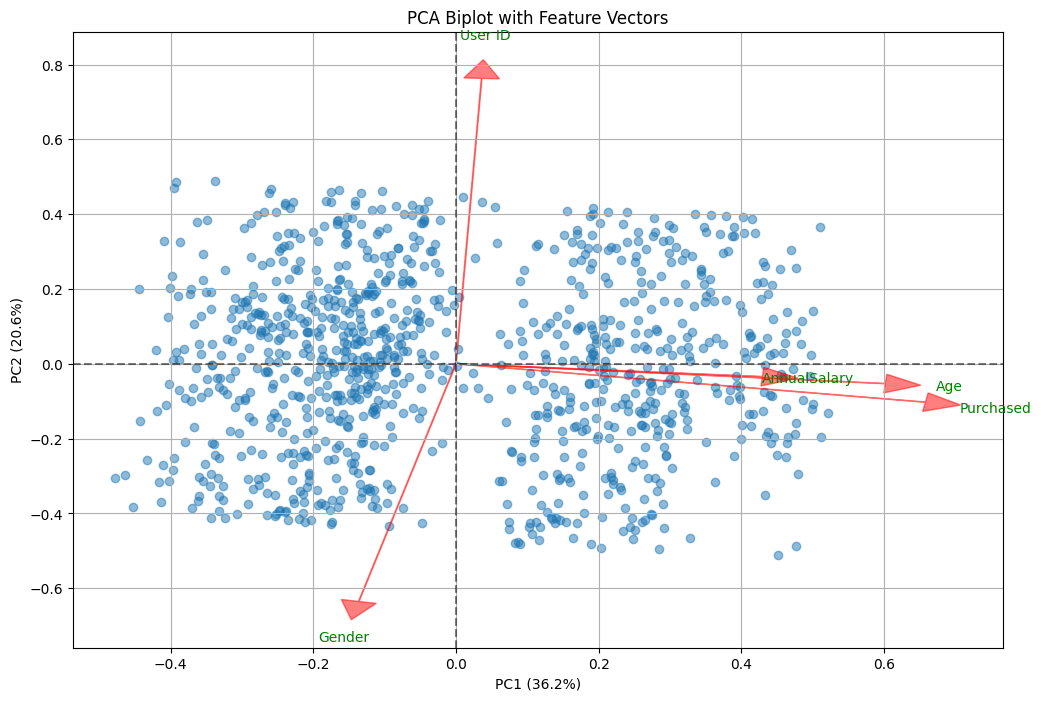

Explained variance per component:
[0.36246547 0.20579011 0.19153806 0.17109299 0.06911336]

PCA Loadings Matrix:
                   PC1       PC2       PC3       PC4       PC5
User ID       0.035998  0.762944  0.643366  0.051955 -0.001437
Gender       -0.136277 -0.635169  0.754767  0.073831 -0.053532
Age           0.601951 -0.052892  0.066535 -0.481750 -0.631148
AnnualSalary  0.429660 -0.034278 -0.053771  0.864509 -0.252885
Purchased     0.658164 -0.102494  0.095341 -0.111315  0.731323


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('age_buynotbuy.csv')

# Convert categorical columns to numerical values
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Create the biplot
def biplot(score, coeff, labels=None):
    plt.figure(figsize=(12, 8))
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    # Plot scores (data points)
    plt.scatter(xs * scalex, ys * scaley, alpha=0.5)
    
    # Plot arrows (loadings)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5, 
                 head_width=0.05, head_length=0.05)
        if labels is None:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, f"Var{i+1}", 
                    color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, labels[i], 
                    color='g', ha='center', va='center')
    
    plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
    plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
    plt.grid()
    plt.title('PCA Biplot with Feature Vectors')
    plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
    plt.axvline(x=0, color='k', linestyle='--', alpha=0.5)
    plt.show()

# Create biplot with feature names
biplot(pca_result[:,:2], np.transpose(pca.components_[:2, :]), labels=df.columns)

# Display explained variance
print("Explained variance per component:")
print(pca.explained_variance_ratio_)

# Display loadings matrix
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                        index=df.columns)
print("\nPCA Loadings Matrix:")
print(loadings)

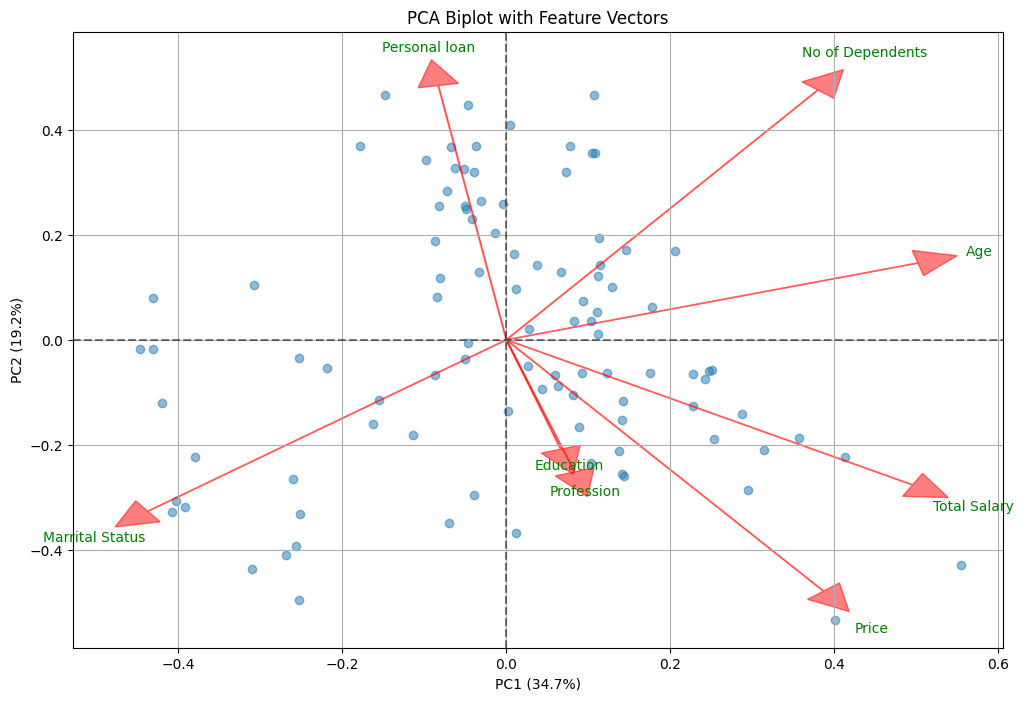

Explained variance per component:
[0.34653101 0.1920909  0.14332375 0.11282393 0.08822937 0.04894954
 0.04512684 0.02292466]

PCA Loadings Matrix:
                       PC1       PC2       PC3       PC4       PC5       PC6  \
Age               0.501727  0.146188 -0.023201  0.076935  0.174596 -0.166272   
Profession        0.083224 -0.251248  0.681966 -0.446112 -0.465315  0.127663   
Marrital Status  -0.437035 -0.326370  0.016456 -0.021873  0.422051  0.493329   
Education         0.066327 -0.208098  0.555692  0.779063  0.136463 -0.051054   
No of Dependents  0.379792  0.475587  0.025641  0.150289 -0.153474  0.714944   
Personal loan    -0.082900  0.484098  0.447788 -0.331813  0.622676 -0.060815   
Total Salary      0.495287 -0.276125  0.024150 -0.182478  0.260782 -0.252412   
Price             0.386678 -0.478437 -0.153508 -0.147184  0.277420  0.362658   

                       PC7       PC8  
Age               0.785283 -0.213638  
Profession        0.178222 -0.035727  
Marrital Status

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('age_salary.csv')

# Convert categorical columns to numerical values
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Create the biplot
def biplot(score, coeff, labels=None):
    plt.figure(figsize=(12, 8))
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    # Plot scores (data points)
    plt.scatter(xs * scalex, ys * scaley, alpha=0.5)
    
    # Plot arrows (loadings)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5, 
                 head_width=0.05, head_length=0.05)
        if labels is None:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, f"Var{i+1}", 
                    color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, labels[i], 
                    color='g', ha='center', va='center')
    
    plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
    plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
    plt.grid()
    plt.title('PCA Biplot with Feature Vectors')
    plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
    plt.axvline(x=0, color='k', linestyle='--', alpha=0.5)
    plt.show()

# Create biplot with feature names
biplot(pca_result[:,:2], np.transpose(pca.components_[:2, :]), labels=df.columns)

# Display explained variance
print("Explained variance per component:")
print(pca.explained_variance_ratio_)

# Display loadings matrix
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                        index=df.columns)
print("\nPCA Loadings Matrix:")
print(loadings)

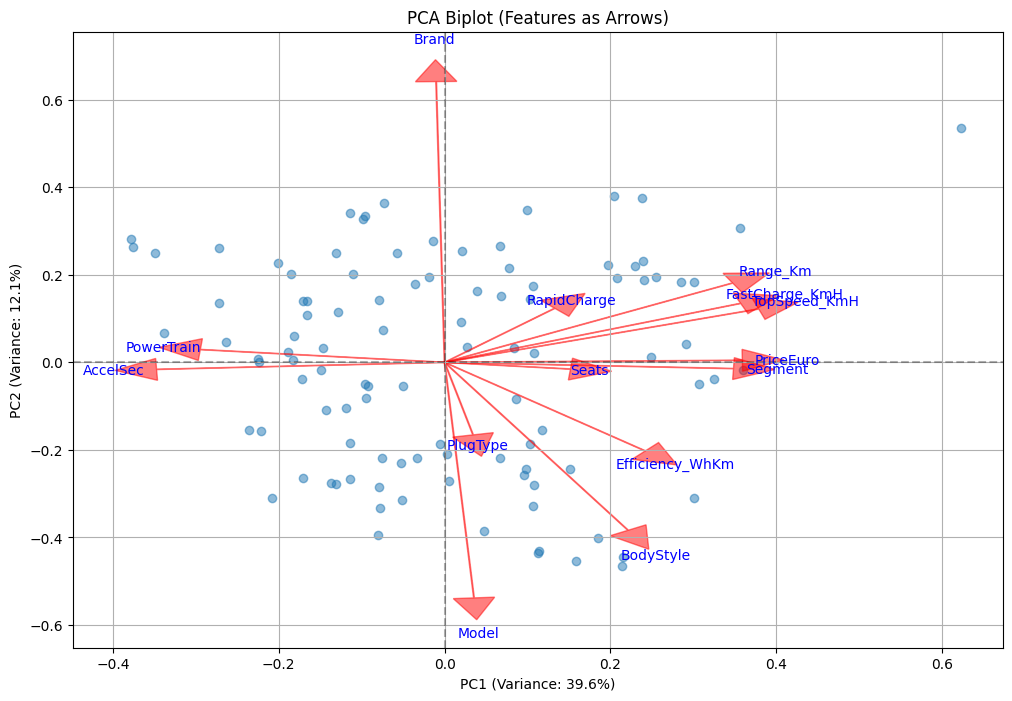

Explained Variance per Component:
PC1: 39.57%
PC2: 12.14%
PC3: 10.03%
PC4: 8.74%
PC5: 6.06%
PC6: 5.35%
PC7: 4.20%
PC8: 3.91%
PC9: 2.99%
PC10: 2.78%
PC11: 1.54%
PC12: 1.36%
PC13: 0.70%
PC14: 0.63%

PCA Loadings Matrix:
                      PC1       PC2       PC3       PC4       PC5       PC6  \
Brand           -0.010184  0.641731 -0.153950 -0.011095  0.173895 -0.298979   
Model            0.035410 -0.538266  0.044512 -0.279419  0.526530 -0.185347   
AccelSec        -0.347347 -0.016014 -0.281324 -0.005590  0.087288  0.093223   
TopSpeed_KmH     0.378752  0.122071  0.089737 -0.234066  0.077829 -0.025520   
Range_Km         0.347333  0.181351  0.112302 -0.001614 -0.031155 -0.167382   
Efficiency_WhKm  0.241996 -0.202364 -0.336607  0.092562 -0.518275  0.221201   
FastCharge_KmH   0.357029  0.134822  0.123105 -0.081476  0.043616 -0.276571   
RapidCharge      0.132832  0.123567  0.283914  0.471042  0.477005  0.566591   
PowerTrain      -0.294558  0.029302  0.042531 -0.093459  0.061401 -0.32

In [23]:
# speedefficiencyPrice.csv
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Load the Excel file
file_path = 'speedefficiencyPrice.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# 2. Convert categorical columns to numerical (if any)
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# 3. Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 4. Perform PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# 5. Define a function to create a biplot (scatter + arrows)
def biplot(score, coeff, feature_names):
    plt.figure(figsize=(12, 8))
    
    # Scatter plot of PCA results
    xs = score[:, 0]
    ys = score[:, 1]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs*scalex, ys*scaley, alpha=0.5)
    
    # Add arrows for each feature
    for i, feature in enumerate(feature_names):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5,
                 head_width=0.05, head_length=0.05)
        plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, feature,
                color='b', ha='center', va='center', fontsize=10)
    
    # Add labels and grid
    plt.xlabel(f"PC1 (Variance: {pca.explained_variance_ratio_[0] * 100:.1f}%)")
    plt.ylabel(f"PC2 (Variance: {pca.explained_variance_ratio_[1] * 100:.1f}%)")
    plt.title("PCA Biplot (Features as Arrows)")
    plt.grid(True)
    plt.axhline(0, color='k', linestyle='--', alpha=0.3)
    plt.axvline(0, color='k', linestyle='--', alpha=0.3)
    plt.show()

# 6. Generate the biplot
biplot(
    pca_result[:, :2],  # First two PCs
    pca.components_.T[:, :2],  # Transposed loadings
    df.columns  # Feature names
)

# 7. Print explained variance
print("Explained Variance per Component:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var * 100:.2f}%")

# 8. Show loadings matrix
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=df.columns
)
print("\nPCA Loadings Matrix:")
print(loadings)


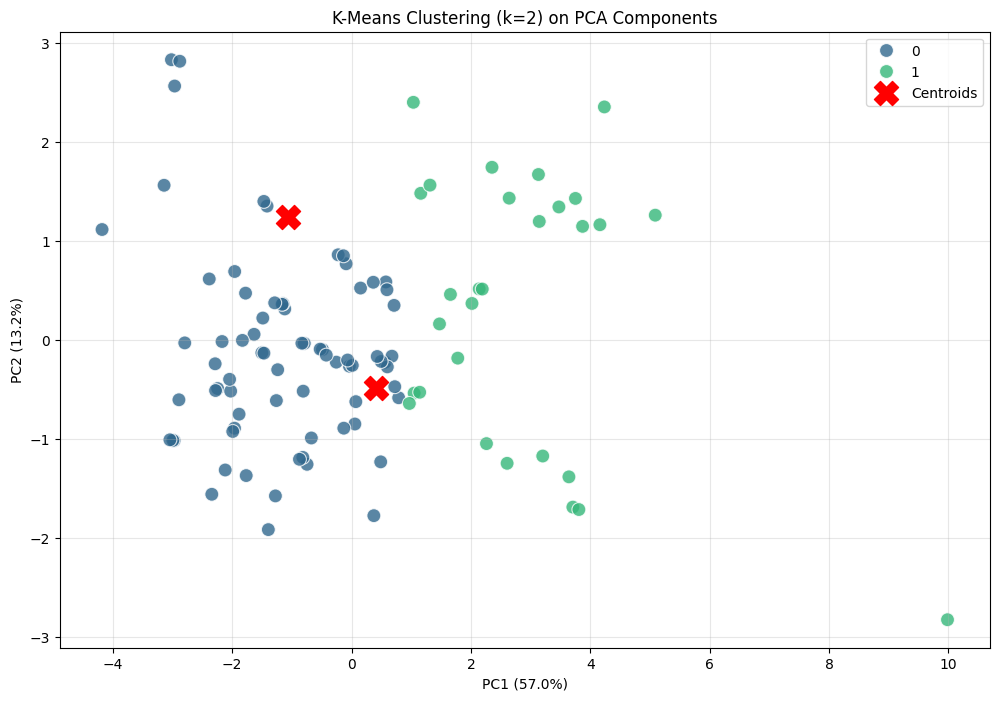


Numerical Features by Cluster:
         AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm  FastCharge_KmH  \
Cluster                                                                        
0        8.640541    158.094595  296.959459       181.175676      349.864865   
1        4.220690    233.034483  445.517241       209.551724      685.172414   

            PriceEuro  
Cluster                
0        42227.675676  
1        90473.896552  

Categorical Features by Cluster:

Brand distribution:
Brand    0.009709  0.019417  0.029126  0.038835  0.048544  0.058252  0.077670  \
Cluster                                                                         
0        0.175676  0.081081  0.189189  0.094595  0.135135  0.081081  0.189189   
1        0.068966  0.000000  0.034483  0.034483  0.172414  0.000000  0.068966   

Brand    0.087379  0.126214  
Cluster                      
0        0.054054  0.000000  
1        0.172414  0.448276  

PowerTrain distribution:
PowerTrain         0    1

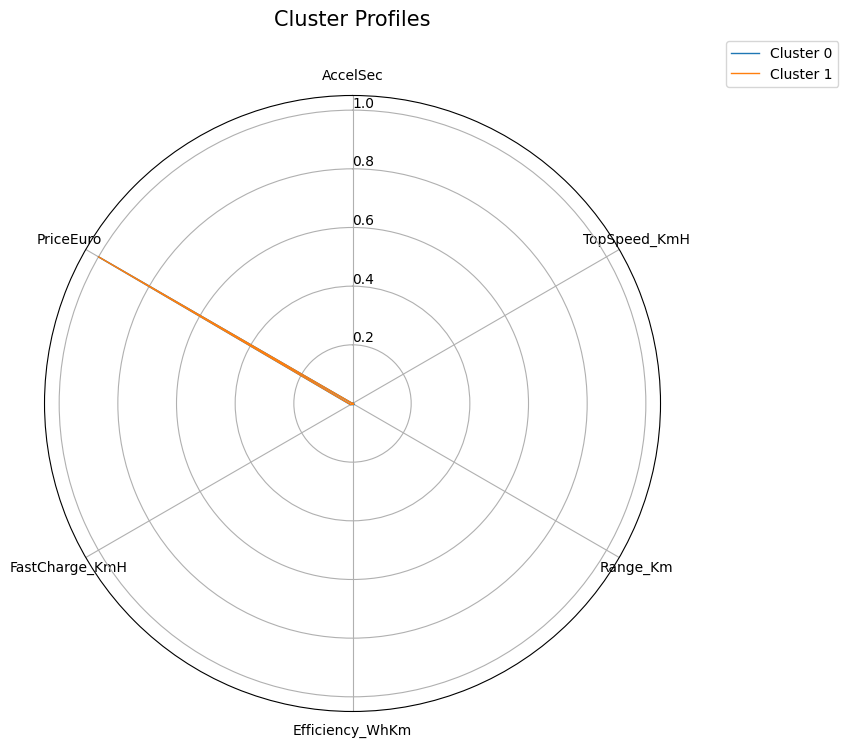

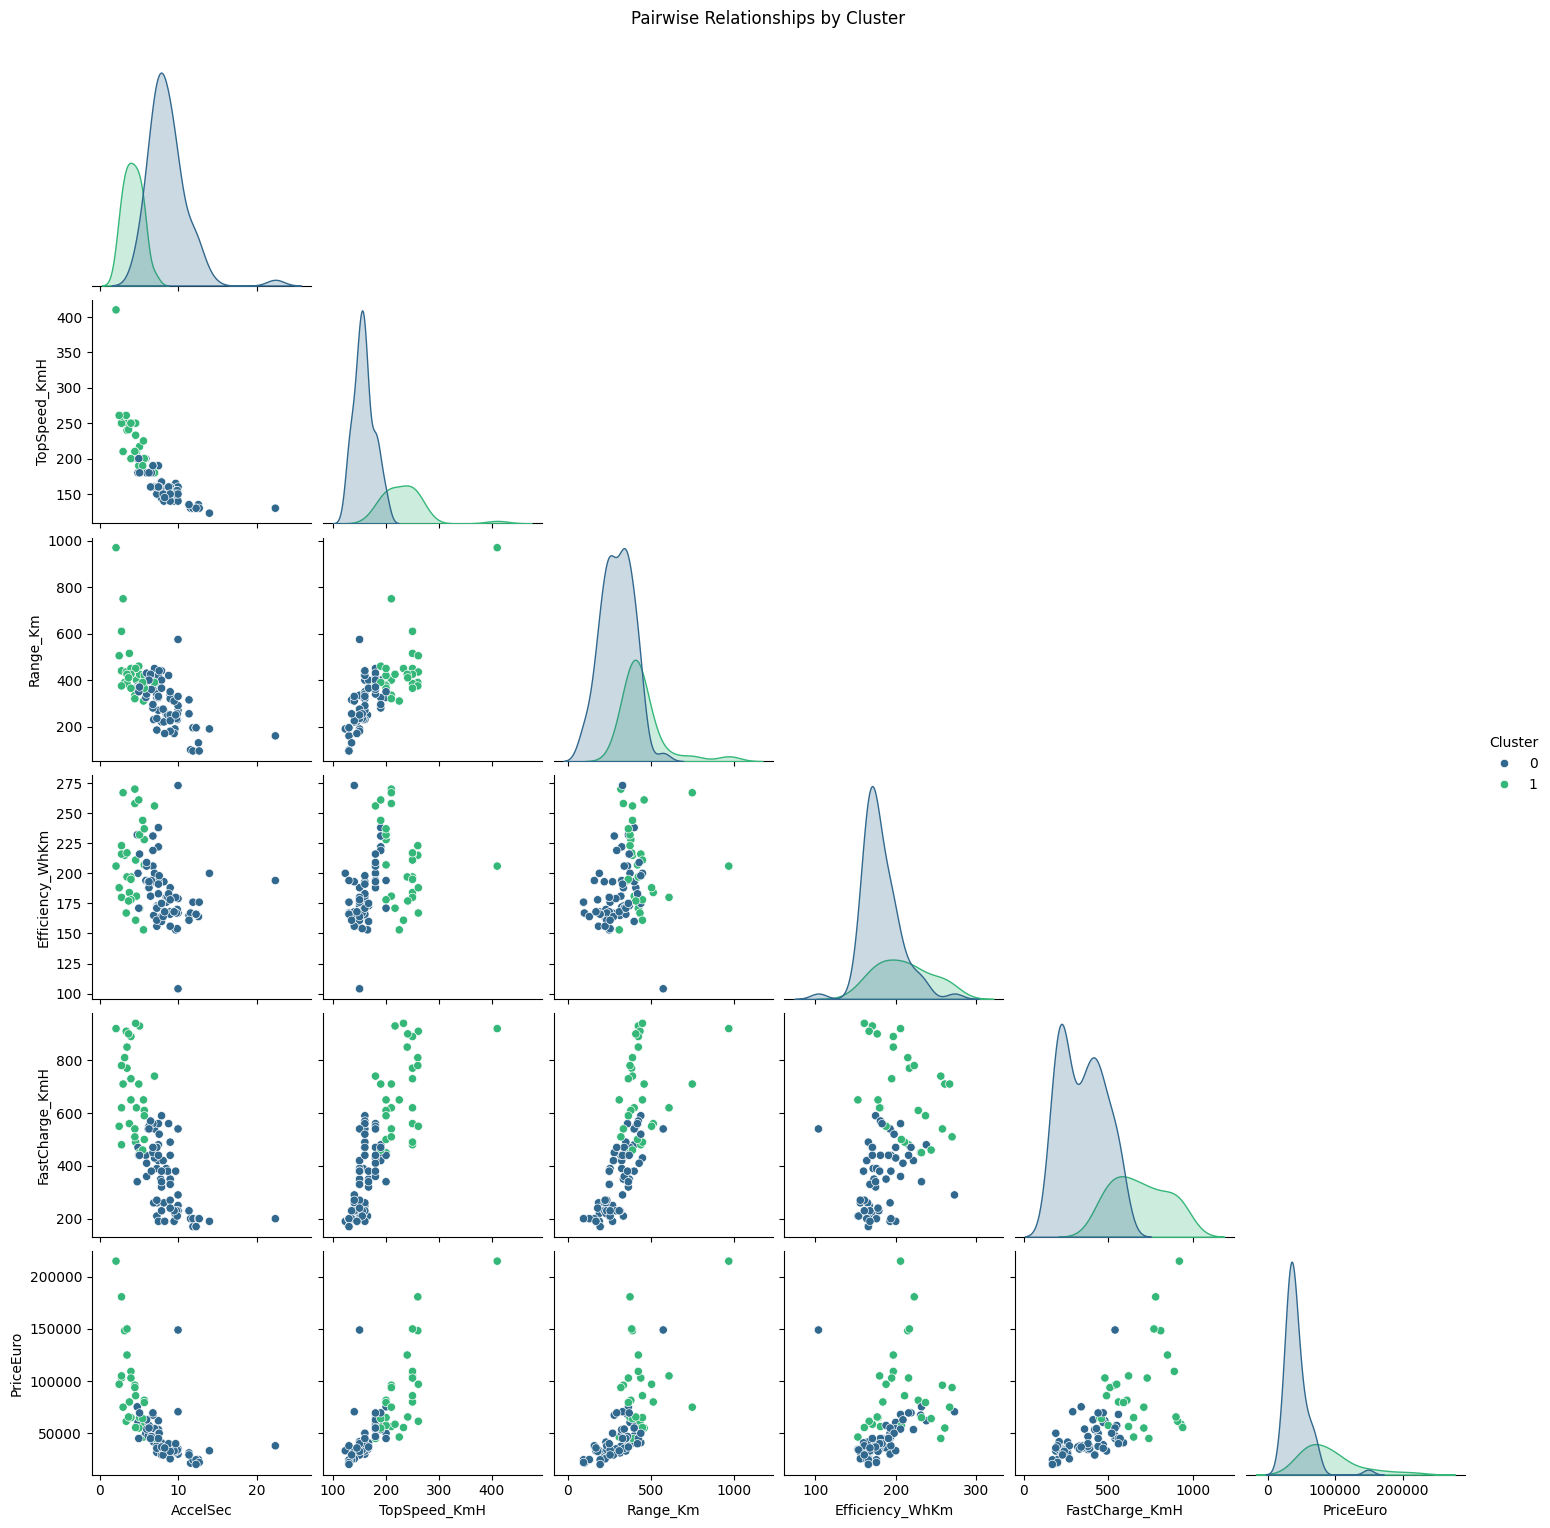

In [12]:
# =====================================
# K-Means Clustering with k=3
# =====================================
from sklearn.cluster import KMeans  # This is the missing import

# Set k=3 based on earlier analysis
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add clusters to PCA results for visualization
pca_df = pd.DataFrame(pca_result[:,:2], columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Plot clustered data in PCA space
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', 
                palette='viridis', s=100, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', marker='X', label='Centroids')
plt.title(f'K-Means Clustering (k={k}) on PCA Components')
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Analyze cluster characteristics
df['Cluster'] = clusters

# 1. Numerical features summary
print("\nNumerical Features by Cluster:")
print(df.groupby('Cluster')[['AccelSec', 'TopSpeed_KmH', 'Range_Km', 
                           'Efficiency_WhKm', 'FastCharge_KmH', 'PriceEuro']].mean())

# 2. Categorical features summary
print("\nCategorical Features by Cluster:")
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col} distribution:")
        print(pd.crosstab(df['Cluster'], df[col], normalize='index'))

# 3. Radar plot for cluster profiles (for numerical features)
def plot_radar_chart(cluster_stats, features):
    categories = features
    N = len(categories)
    
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})
    
    for cluster in cluster_stats.index:
        values = cluster_stats.loc[cluster, features].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', 
                label=f'Cluster {cluster}')
        ax.fill(angles, values, alpha=0.1)
    
    ax.set_theta_offset(np.pi/2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories)
    ax.set_rlabel_position(0)
    plt.title('Cluster Profiles', size=15, y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.show()

# Select numerical features for radar plot
num_features = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH', 'PriceEuro']
cluster_stats = df.groupby('Cluster')[num_features].mean()

# Normalize for radar plot
cluster_stats_normalized = cluster_stats.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)
plot_radar_chart(cluster_stats_normalized, num_features)

# 4. Pairplot with cluster coloring
cluster_sample = df.sample(min(200, len(df)))  # Sample for better visualization
sns.pairplot(cluster_sample, vars=num_features, hue='Cluster', 
             palette='viridis', corner=True)
plt.suptitle('Pairwise Relationships by Cluster', y=1.02)
plt.show()

Original Data Sample:
        Brand                          Model  AccelSec  TopSpeed_KmH  \
0       Tesla  Model 3 Long Range Dual Motor       4.6           233   
1  Volkswagen                      ID.3 Pure      10.0           160   
2    Polestar                              2       4.7           210   
3         BMW                            iX3       6.8           180   
4       Honda                              e       9.5           145   

   Range_Km  Efficiency_WhKm  FastCharge_KmH RapidCharge PowerTrain  \
0       450              161             940         Yes        AWD   
1       270              167             250          No        RWD   
2       400              181             620         Yes        AWD   
3       360              206             560         Yes        RWD   
4       170              168             190         Yes        RWD   

     PlugType  BodyStyle Segment  Seats  PriceEuro  
0  Type 2 CCS      Sedan       D      5      55480  
1  Type 2 CC

C:\Users\prash\AppData\Local\Temp\ipykernel_13360\592306766.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


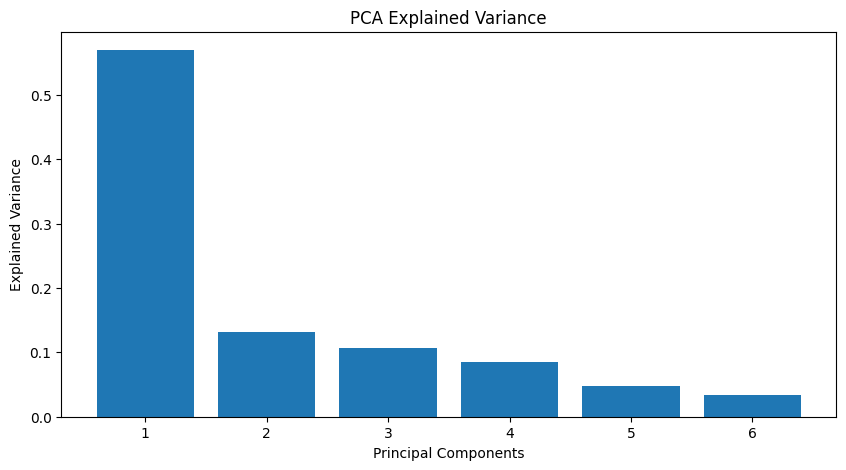

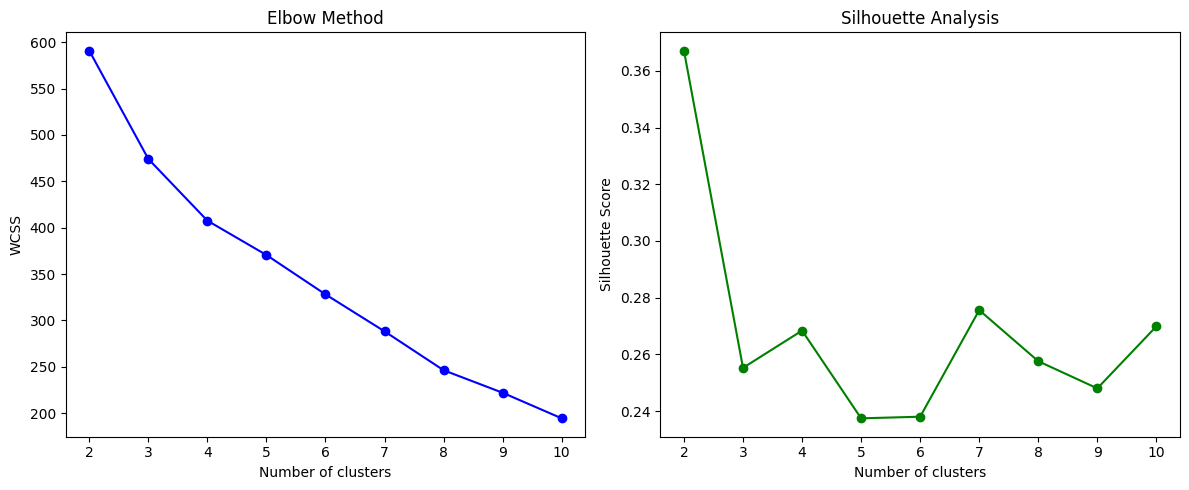

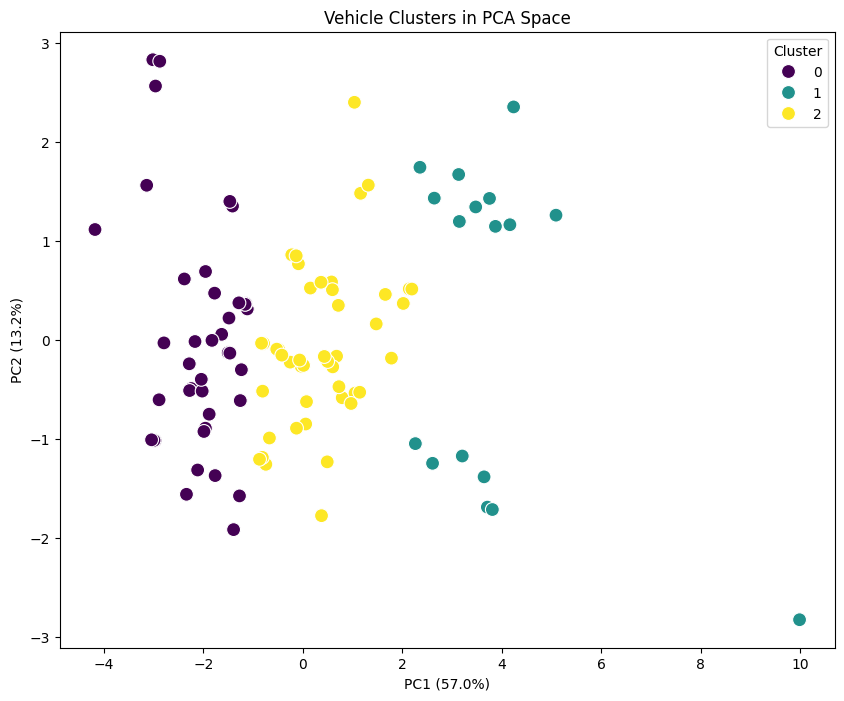


Cluster Characteristics (Numerical Features):
         AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm  FastCharge_KmH  \
Cluster                                                                        
0        9.940000    145.775000  228.750000       171.125000      255.750000   
1        3.494118    255.470588  489.705882       198.352941      755.294118   
2        6.626087    180.065217  378.695652       201.456522      493.260870   

         RapidCharge      PriceEuro  Power_to_Weight  FastCharge_Ratio  
Cluster                                                                 
0           0.600000   32431.225000        15.567976          1.179520  
1           0.941176  106969.941176        78.973824          1.651944  
2           0.804348   57235.934783        28.998270          1.313622  

Cluster Characteristics (Categorical Features):

Brand distribution:
Brand    0.009709  0.019417  0.029126  0.038835  0.048544  0.058252  0.077670  \
Cluster                             

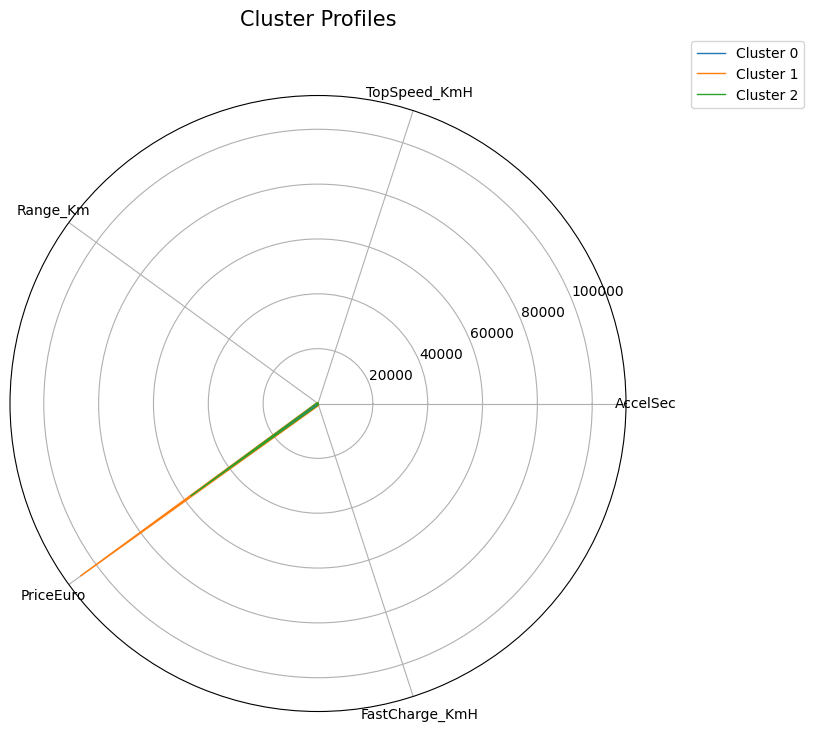

In [10]:
# preprocess abs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score  # This was missing

# Load the data
df = pd.read_csv('speedefficiencyPrice.csv')

# Display original data
print("Original Data Sample:")
print(df.head())

# =====================================
# 1. Advanced Preprocessing
# =====================================

# Handle missing values if any
df.fillna(method='ffill', inplace=True)

# Convert 'RapidCharge' to binary (1=Yes, 0=No)
df['RapidCharge'] = df['RapidCharge'].map({'Yes': 1, 'No': 0})

# Create new features that might be useful
df['Power_to_Weight'] = df['TopSpeed_KmH'] / df['AccelSec']
df['FastCharge_Ratio'] = df['FastCharge_KmH'] / df['Range_Km']

# Select columns for clustering (excluding Model which is too specific)
cluster_cols = [
    'AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 
    'FastCharge_KmH', 'RapidCharge', 'PriceEuro',
    'Power_to_Weight', 'FastCharge_Ratio'
]

# Extract categorical columns that need encoding
categorical_cols = ['Brand', 'PowerTrain', 'PlugType', 'BodyStyle', 'Segment']
for col in categorical_cols:
    if col in df.columns:
        # Frequency encoding for high cardinality features
        if col == 'Brand':
            freq = df[col].value_counts(normalize=True)
            df[col] = df[col].map(freq)
        else:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[cluster_cols])

# =====================================
# 2. PCA Analysis
# =====================================

pca = PCA(n_components=0.95)  # Keep 95% of variance
pca_result = pca.fit_transform(scaled_data)

# Plot explained variance
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

# =====================================
# 3. Elbow Method for Optimal Clusters
# =====================================

wcss = []
sil_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(scaled_data, kmeans.labels_))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(k_range, sil_scores, 'go-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.tight_layout()
plt.show()

# =====================================
# 4. K-Means Clustering with k=3
# =====================================

optimal_k = 3  # Based on elbow and silhouette
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize clusters in PCA space
pca_df = pd.DataFrame(pca_result[:,:2], columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100)
plt.title('Vehicle Clusters in PCA Space')
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.show()

# =====================================
# 5. Cluster Analysis
# =====================================

# Numerical features summary
print("\nCluster Characteristics (Numerical Features):")
cluster_stats = df.groupby('Cluster')[cluster_cols].mean()
print(cluster_stats)

# Categorical features summary
print("\nCluster Characteristics (Categorical Features):")
for col in ['Brand', 'PowerTrain', 'BodyStyle', 'Segment']:
    print(f"\n{col} distribution:")
    print(df.groupby(['Cluster', col]).size().unstack().fillna(0))

# Radar plot function
def plot_radar_chart(cluster_stats, features):
    categories = features
    N = len(categories)
    
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})
    
    for cluster in cluster_stats.index:
        values = cluster_stats.loc[cluster, features].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', 
                label=f'Cluster {cluster}')
        ax.fill(angles, values, alpha=0.1)
    
    plt.xticks(angles[:-1], categories)
    plt.title('Cluster Profiles', size=15, y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.show()

# Select key features for radar plot
radar_features = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'PriceEuro', 'FastCharge_KmH']
plot_radar_chart(cluster_stats[radar_features], radar_features)